Predicting Tumour Size with Regression 

In [22]:
# Libraries 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf
import seaborn as sns
from pandas import read_csv 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 

In [23]:
# Importing Dataset and extracting the independent and dependent variables 
tumour = pd.read_csv('C:/Users/marcv/Downloads/regression.csv')

#Splitting the data set
X = tumour.iloc[:, :-1].values
y = tumour.iloc[:, 9].values 
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [24]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regression using Neural Networks

In [25]:
# Defining the model 
model = Sequential()
model.add(Dense(128, input_dim = 9, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

# Output Layer
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1280      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
183/183 [==============================] - 1s 1ms/step - loss: 45.6167 - mae: 5.0720 - val_loss: 29.9462 - val_mae: 4.3290
Epoch 2/100
183/183 [==============================] - 0s 800us/step - loss: 27.1267 - mae: 4.2315 - val_loss: 25.6583 - val_mae: 4.1971
Epoch 3/100
183/183 [==============================] - 0s 822us/step - loss: 25.1622 - mae: 4.1034 - val_loss: 24.6390 - val_mae: 4.0264
Epoch 4/100
183/183 [==============================] - 0s 1ms/step - loss: 24.5288 - mae: 4.0244 - val_loss: 24.4961 - val_mae: 3.9986
Epoch 5/100
183/183 [==============================] - 0s 919us/step - loss: 24.0536 - mae: 3.9580 - val_loss: 23.8873 - val_mae: 3.9549
Epoch 6/100
183/183 [==============================] - 0s 867us/step - loss: 23.7545 - mae: 3.9468 - val_loss: 24.1654 - val_mae: 3.9951
Epoch 7/100
183/183 [==============================] - 0s 2ms/step - loss: 23.4386 - mae: 3.9131 - val_loss: 23.5948 - val_mae: 3.9185
Epoch 8/100
183/183 [==========================

183/183 [==============================] - 0s 939us/step - loss: 17.6104 - mae: 3.2832 - val_loss: 19.7648 - val_mae: 3.3921
Epoch 61/100
183/183 [==============================] - 0s 1ms/step - loss: 17.8281 - mae: 3.2709 - val_loss: 19.6837 - val_mae: 3.3787
Epoch 62/100
183/183 [==============================] - 0s 1ms/step - loss: 17.4470 - mae: 3.2622 - val_loss: 20.5707 - val_mae: 3.5034
Epoch 63/100
183/183 [==============================] - 0s 865us/step - loss: 17.5236 - mae: 3.2624 - val_loss: 20.0418 - val_mae: 3.3590
Epoch 64/100
183/183 [==============================] - 0s 959us/step - loss: 17.3712 - mae: 3.2435 - val_loss: 19.6441 - val_mae: 3.4432
Epoch 65/100
183/183 [==============================] - 0s 1ms/step - loss: 17.3692 - mae: 3.2505 - val_loss: 19.6318 - val_mae: 3.4063
Epoch 66/100
183/183 [==============================] - 0s 858us/step - loss: 17.3150 - mae: 3.2486 - val_loss: 20.0643 - val_mae: 3.4184
Epoch 67/100
183/183 [==============================]

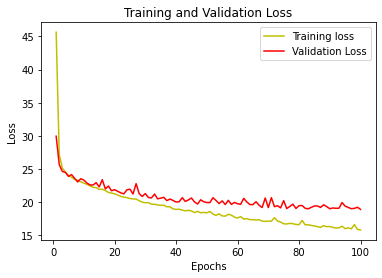

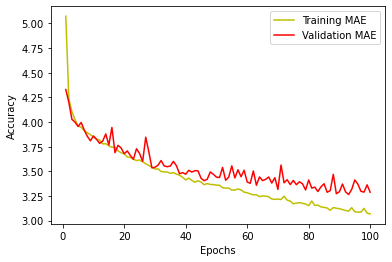

In [27]:
#Plotting loss and validation loss
from matplotlib import pyplot as plt 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label = 'Training MAE')
plt.plot(epochs, val_acc, 'r', label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
#Predict on test data 
predictions = model.predict(X_test_scaled)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test)

Predicted values are:  [[8.205455 ]
 [4.4463253]
 [3.5373957]
 ...
 [7.3034916]
 [1.0536001]
 [1.3886383]]
Real values are:  [ 1.95   1.715 14.726 ... 15.887  2.     2.383]


58/58 [==============================] - 0s 605us/step - loss: 20.2044 - mae: 3.4044
R2 Score: 47.0 %
Mean squared error from neural net:  20.204376220703125
Mean absolute error from neural net:  3.404419183731079


Text(0.5, 0, 'Actual')

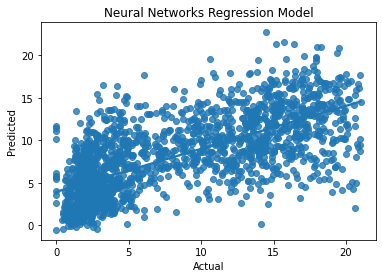

In [29]:
# Mean Square Error and Mean absolute Error and Plot
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
r2 = r2_score(y_test, predictions)
print('R2 Score:', round(r2, 2)*100, '%')
print("Mean squared error from neural net: ", mse_neural)
print("Mean absolute error from neural net: ", mae_neural)
sns.regplot(x = y_test, y = predictions)
plt.title("Neural Networks Regression Model")
plt.ylabel('Predicted')
plt.xlabel('Actual')

Regression using Multiple Linear Regression

R2 Score: 28.000000000000004 %
Mean squared error from multiple linear regression:  27.597227106999483
Mean absolute error from multiple linear regression:  4.371652436946849


Text(0.5, 0, 'Actual')

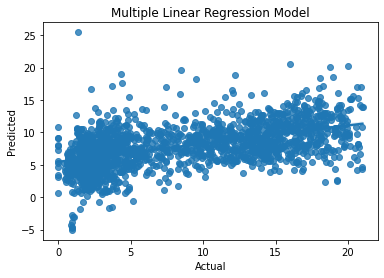

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred_mlr = regressor.predict(X_test_scaled)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
r2 = r2_score(y_test, y_pred_mlr)
print('R2 Score:', round(r2, 2)*100, '%')
print("Mean squared error from multiple linear regression: ", mse_mlr)
print("Mean absolute error from multiple linear regression: ", mae_mlr )
sns.regplot(x = y_test, y = y_pred_mlr)
plt.title("Multiple Linear Regression Model")
plt.ylabel('Predicted')
plt.xlabel('Actual')

Random Forest Regression 

R2 Score: 53.0 %
Mean squared error from Random Forest:  17.846232797436397
Mean absolute error from Random Forest:  3.039468806921676


Text(0.5, 0, 'Actual')

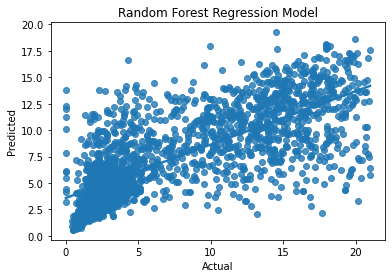

In [31]:
from sklearn.ensemble import RandomForestRegressor 
model_rf = RandomForestRegressor(n_estimators = 30, random_state = 30)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print('R2 Score:', round(r2, 2)*100, '%')
print("Mean squared error from Random Forest: ", mse_rf)
print("Mean absolute error from Random Forest: ", mae_rf)
sns.regplot(x = y_test, y = y_pred_rf)
plt.title("Random Forest Regression Model")
plt.ylabel('Predicted')
plt.xlabel('Actual')